# House Price Preduction


Let's go step by step through the Machine Learning Lifecycle using House Price Prediction as our example. We'll use Python with Pandas, NumPy, Scikit-learn, and Matplotlib.

1. Problem Definition & Goal Setting :

We want to predict the price of a house based on various factors like the number of bedrooms, square footage, location, and other features. The goal is to build an accurate regression model that minimizes the error between predicted and actual house prices.

Metrics for evaluation:

Mean Absolute Error (MAE)

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

R² Score

## Data Collection 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


In [3]:
df.head()# First Five values of datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
 df.tail() #last five values of datasets

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Data Preprocessing & Cleaning

In [5]:
print(df.isnull().sum()) # finding missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [6]:
df.fillna(df.median(),inplace=True) #replacing the missing values by  median values

C:\Users\Admin\AppData\Local\Temp\ipykernel_14204\1368014836.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(),inplace=True) #replacing the missing values by  median values


In [7]:
df.drop_duplicates(inplace=True)# Remove duplicate records

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


## Exploratory Data Analysis (EDA)
We'll analyze distributions, correlations, and visualize important features.

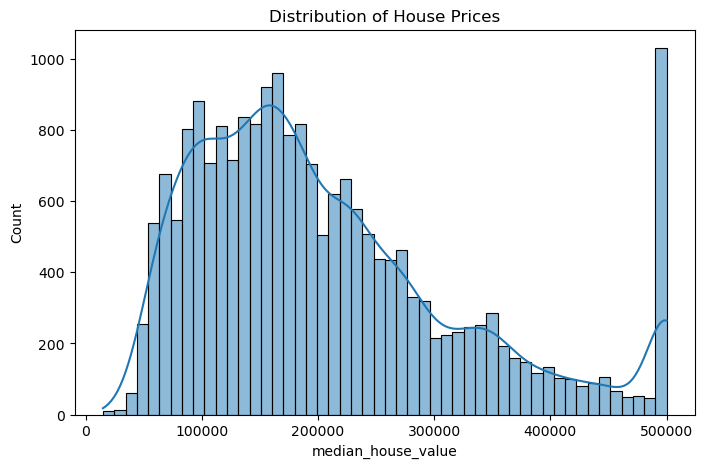

In [9]:
# Check the distribution of house prices
plt.figure(figsize=(8,5))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14204\2508253012.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


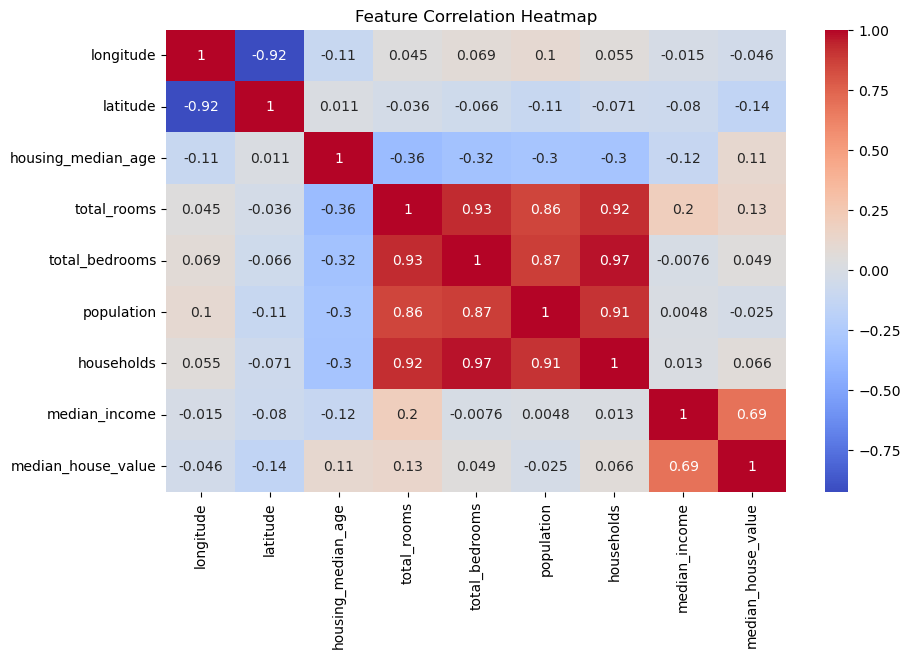

In [10]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Feature Engineering
We'll select relevant features and create new ones.

In [12]:
# Convert categorical feature "ocean_proximity" to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [13]:
# Create new feature: Price per Room
df["price_per_room"] = df["median_house_value"] / df["total_rooms"]

In [14]:
features = ['median_income', 'total_rooms', 'housing_median_age', 'latitude', 'longitude', 'price_per_room']
X = df[features]
y = df["median_house_value"]

## Model Selection & Training
We'll split data into training and testing sets and train a regression model.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 3.73131514e+04  3.67923013e+00  1.16893901e+03 -4.38062255e+04
 -4.46040316e+04  5.95869778e+00]
Intercept: -3754155.0862589586


## Model Evaluation & Optimization
We'll evaluate performance using different metrics.

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Predictions
y_pred = model.predict(X_test)

In [21]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 53981.98981927454
Mean Squared Error (MSE): 5387480509.340707
Root Mean Squared Error (RMSE): 73399.45850849792
R² Score: 0.5888702993646389


## Model Deployment
We'll save the model using joblib

In [22]:
import joblib

# Save the model
joblib.dump(model, "house_price_model.pkl")

# Load the model for future predictions
loaded_model = joblib.load("house_price_model.pkl")

# Predict with the loaded model
new_prediction = loaded_model.predict(X_test[:5])
print("Sample Predictions:", new_prediction)


Sample Predictions: [ 72198.66953183 175331.42342893 256794.89937916 285170.30207398
 268320.39850062]
